In [1]:
import numpy as np
import matplotlib.pyplot as plt2
import ipywidgets as widgets

from scipy.fftpack import fftfreq, fft

from operator import add

from IPython.display import Audio
from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


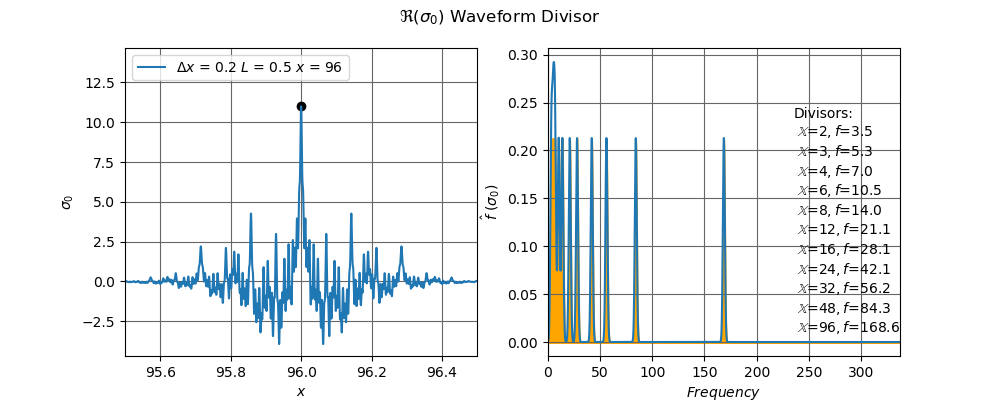

Options:
L is pulse height at dx, Audio is from Real Part.


interactive(children=(Dropdown(description='$\\Delta x$:', index=2, options=(0.1, 0.15, 0.2, 0.25, 0.3, 0.35, …

In [5]:
x2 = np.linspace(0, 101, 400002)
fig, ax2= plt2.subplots(1,2, figsize=(10, 4))
plt2.suptitle('$\Re (\sigma_{0})$ Waveform Divisor')

def update_plot(dx2, L2, sx):
    
    #Set x range (x-0.5)<x<(x+0.5)
    xf=x2[int(400002*(sx-0.5)/101):int(400002*(sx+0.5)/101)]
    
    ax2[0].clear()
    ax2[1].clear()
    
    reD=[0]*400002
    #imD=[0]*400002
    
    #Create list with waves X=2 to X=100
    wave2=list(range(2,101))
    
    #Calculate Solution Wave Devisor Function
    for w2 in wave2:
  
        #N2=-2*(w2**2)*np.log(L2)/((np.pi**2)*(dx2**2))
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        
        reDw = ((np.cos(xf*np.pi/w2))**N2)*(np.cos(np.pi*N2*xf/w2))
        #imDw = (-(np.cos(xf*np.pi/w2))**N2)*(np.sin(np.pi*N2*xf/w2))

        reD=list(map(add, reD, reDw))
        #imD=list(map(add, imD, imDw))

    #Determine maximum Divisor Count
    countD=max(reD)
    ax2[0].plot([sx],[countD], color='black', marker='o')

    #Plot Divisor Function
    units2 = '$\Delta x$ = {} $L$ = {} $x$ = {}'
    ax2[0].plot(xf, reD,color='#1f77b4', label=units2.format(dx2, L2, sx))
    ax2[0].legend(loc=2)
    ax2[0].set_xlabel('$x$')
    ax2[0].set_ylabel('$\sigma_{0}$')
    ax2[0].axis([(sx-0.5), (sx+0.5), None,(countD+countD/3)])
    ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
 
    #Calculate Fourier Transform.
    ampliS=[0]*10000
    
    #Maximum Frequency Range
    N2=-2*(sx**2)*np.log(L2)/((np.pi**2)*(dx2**2))
    N2=2*round(0.5*N2,0)
    fmax=N2/sx
    frange=np.linspace(-fmax,fmax,10000)

    #Fourier Transform Calculated
    lab='Divisors:'
    for w2 in wave2:
 
        #Determine coeficients: a, b calculate Fourier Transform.
        N2=(np.log(L2))/(np.log(np.cos(np.pi*dx2/w2)))
        N2=2*round(0.5*N2,0)
        a=np.log(L2)/(dx2**2)
        b=N2/w2
        
        #Only add waves from divisors of x.
        if (sx%w2)==0:
            Spec = (np.sqrt(np.pi))/(2*np.sqrt(-a))*(np.exp((np.pi**2)*((b-2*frange)**2)/(4*a)) + np.exp((np.pi**2)*((b+2*frange)**2)/(4*a)))
            ampliS=list(map(add, ampliS, Spec))
            lab=lab+'\n $\mathbb{X}$='+str(w2) + '$, f$='+str(np.round(0.5*N2/w2,1)) 
            
            #Plot individual divisor frequencies
            ax2[1].fill_between(frange,Spec, color='orange')

    #Plot summation frequencies.
    ax2[1].annotate(lab, xy=(fmax-fmax/3.3,0.01))
    ax2[1].plot(frange, ampliS,color='#1f77b4')
    ax2[1].set_xlabel('$Frequency$')
    ax2[1].set_ylabel('$\^{f}$ $(\sigma_{0})$')
    ax2[1].axis([0,fmax, None,None]) 
    ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')
    plt2.show()
    
    #Create Audiofile
    display(Audio(reD, rate=30000))

print("Options:")
print("L is pulse height at dx, Audio is from Real Part.")

dx2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.2, description='$\Delta x$:')  
L2 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
sx = widgets.Dropdown(options=list(range(2,101)), description='$x$:')   


widgets.interactive(update_plot, dx2=dx2, L2=L2, sx=sx)



https://mybinder.org/v2/gh/oooVincentooo/Test-Environment/master?filepath=Wave%20Divisor%20Function%20Audio.ipynb